## Enhanced layout analysis using suraya Text Detector

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from surya.foundation import FoundationPredictor
from surya.recognition import RecognitionPredictor
from surya.detection import DetectionPredictor
import torch
from pdf2image import convert_from_path
import os
from tqdm import tqdm
import o s
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm


/Users/maryamsaad/Documents/arabic-ocr-transformer/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

## Reading pdf

In [ ]:


def pdf_to_images(path, dpi=300):
    images = []
    if os.path.isfile(path):
        images.extend(convert_from_path(path, dpi=dpi))
    else:
        for pdf_file in tqdm(os.listdir(path), desc="Converting PDFs"):
            if pdf_file.lower().endswith('.pdf'):
                pdf_path = os.path.join(path, pdf_file)
                images.extend(convert_from_path(pdf_path, dpi=dpi))
    print(f"\n✅ Conversion complete!")
    return images

pages = pdf_to_images("/Users/maryamsaad/Documents/arabic-ocr-transformer/من معتمدات الكتب/المغني لابن قدامة طبعة عالم الكتب 15مجلد/mogni01p.pdf")



✅ Conversion complete!


In [21]:

pages=pages[30:35]

In [22]:
len(pages)

5

## loading model and visualization

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


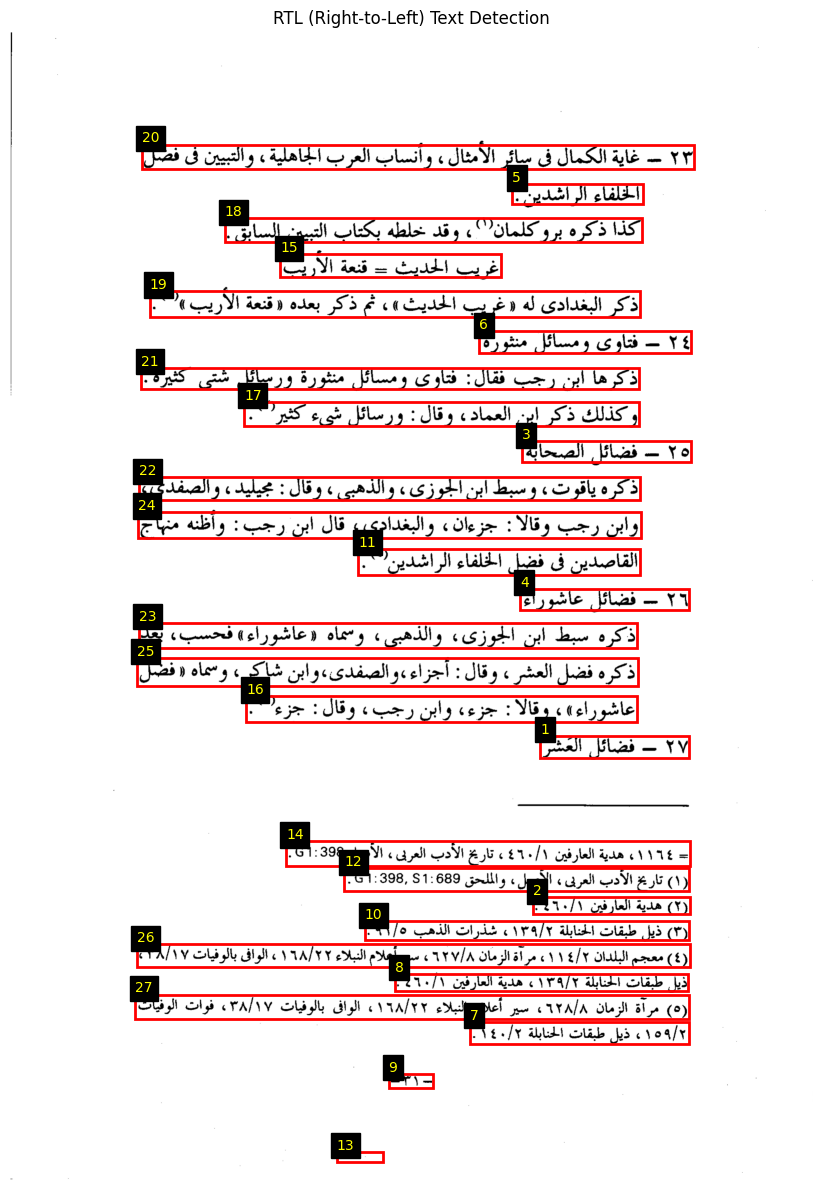

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]]


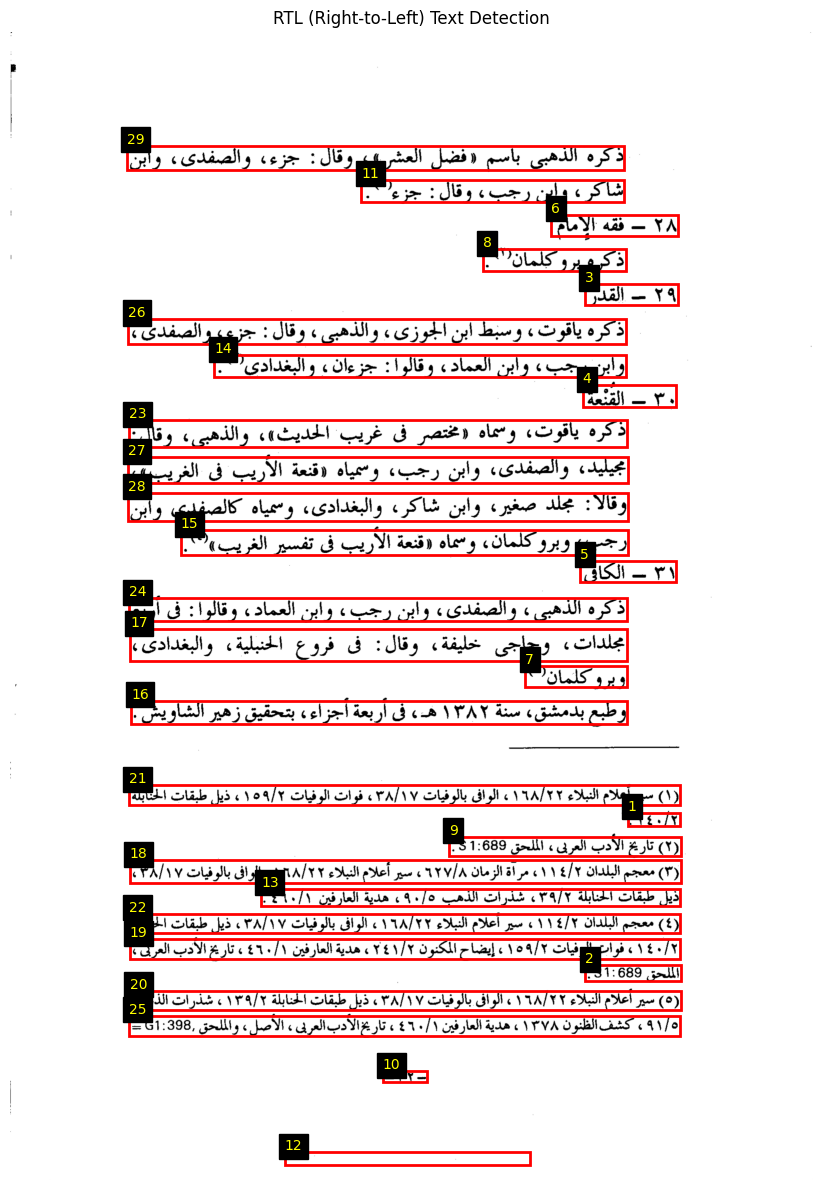

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]]


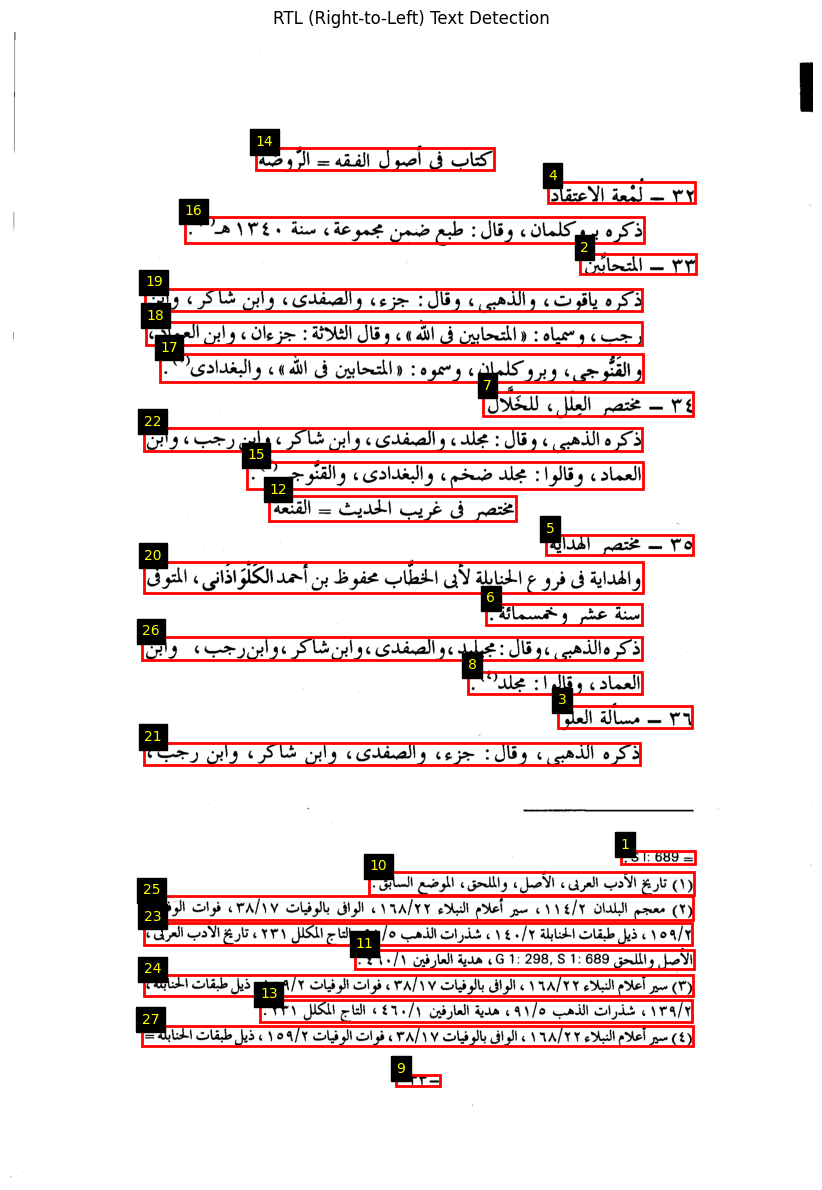

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]]


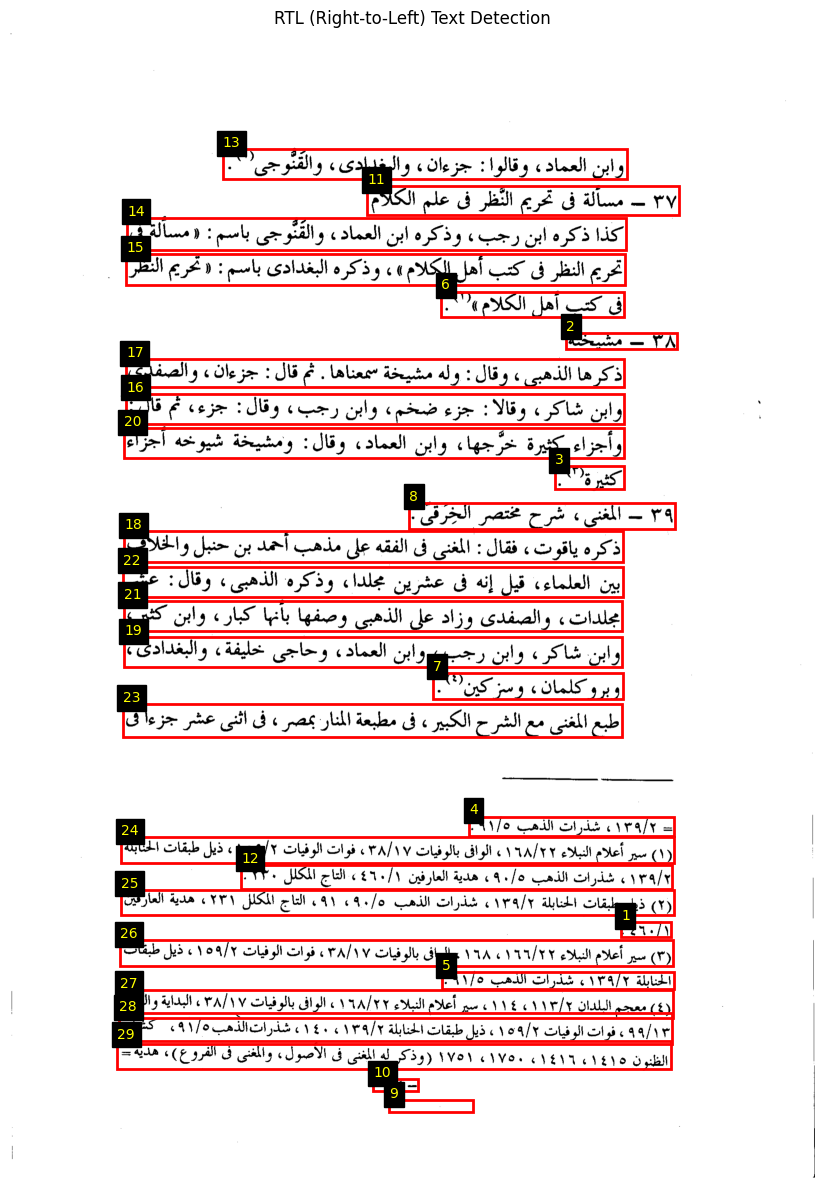

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]]


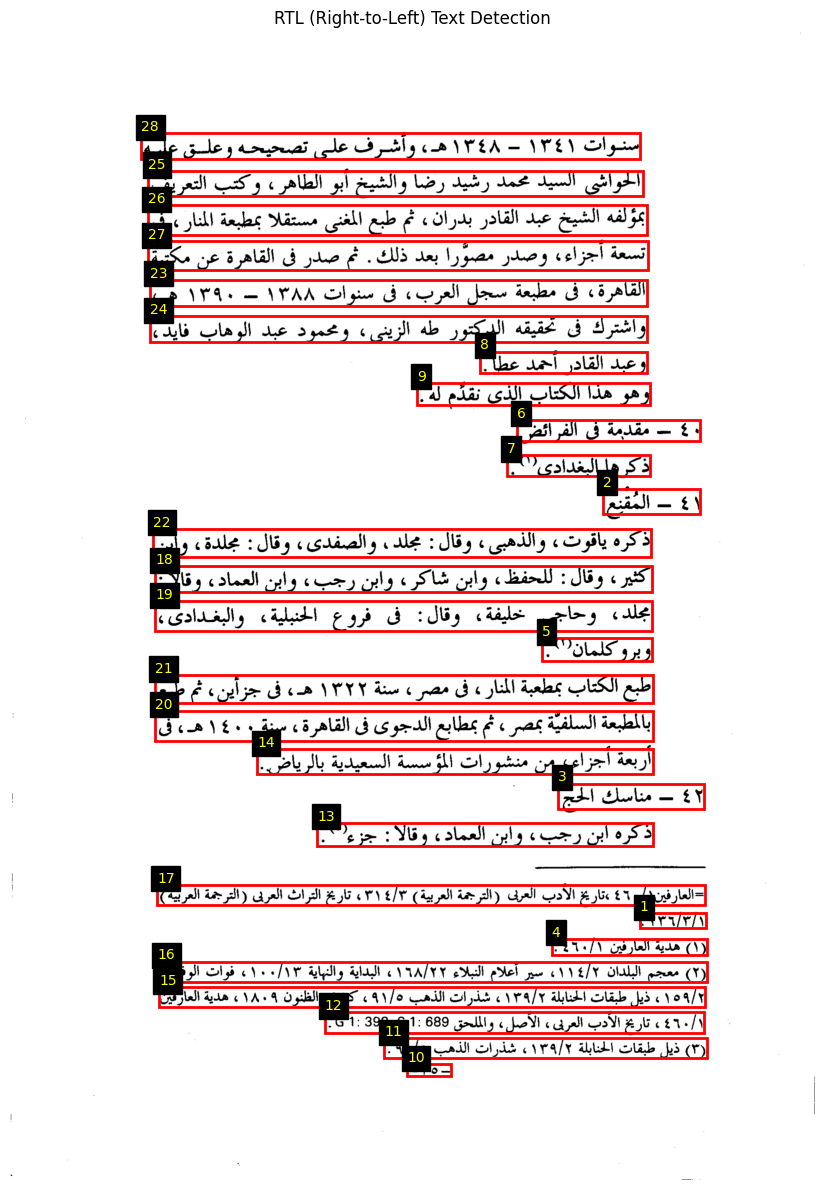

Processing Images: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


In [ ]:
foundation_predictor = FoundationPredictor()
recognition_predictor = RecognitionPredictor(foundation_predictor)
detection_predictor = DetectionPredictor(device=device)

CONF_THRESHOLD = 0.65

for image in tqdm(pages, desc="Processing Images"):
    detection_results = detection_predictor([image])
    det_result = detection_results[0]

    sorted_boxes = sorted(det_result.bboxes, key=lambda b: b.bbox[0], reverse=True)
    sorted_boxes = [box for box in sorted_boxes if box.confidence >= CONF_THRESHOLD]

    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(image)

    for i, bbox in enumerate(sorted_boxes):
        x1, y1, x2, y2 = map(int, bbox.bbox)
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=2, edgecolor="red", facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"{i+1}", color="yellow", fontsize=10, backgroundcolor="black")

    plt.title("Detected Bounding Boxes (RTL Order)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


    cropped_images = []
    for bbox in sorted_boxes:
        x1, y1, x2, y2 = map(int, bbox.bbox)
        cropped_region = image.crop((x1, y1, x2, y2))
        cropped_images.append(cropped_region)


    if cropped_images:
        n = len(cropped_images)
        fig, axs = plt.subplots(1, n, figsize=(4 * n, 4))
        if n == 1:
            axs = [axs]
        for i, crop in enumerate(cropped_images):
            axs[i].imshow(crop)
            axs[i].set_title(f"Box {i+1}")
            axs[i].axis("off")
        plt.tight_layout()
        plt.show()


In [12]:
det_result

TextDetectionResult(bboxes=[PolygonBox(polygon=[[608, 580], [1335, 514], [1408, 847], [682, 913]], confidence=0.6841286420822144, bbox=[608, 514, 1408, 913]), PolygonBox(polygon=[[533, 937], [1462, 937], [1462, 1005], [533, 1005]], confidence=0.9787344336509705, bbox=[533, 937, 1462, 1005]), PolygonBox(polygon=[[551, 1020], [1444, 1020], [1444, 1090], [551, 1090]], confidence=0.9906638860702515, bbox=[551, 1020, 1444, 1090]), PolygonBox(polygon=[[847, 1124], [1123, 1122], [1124, 1158], [848, 1160]], confidence=0.8760373592376709, bbox=[847, 1122, 1124, 1160]), PolygonBox(polygon=[[883, 1370], [1068, 1370], [1068, 1419], [883, 1419]], confidence=0.7878630757331848, bbox=[883, 1370, 1068, 1419]), PolygonBox(polygon=[[512, 1475], [706, 1472], [711, 1571], [517, 1574]], confidence=0.8127593398094177, bbox=[512, 1472, 711, 1574]), PolygonBox(polygon=[[1297, 1476], [1492, 1476], [1492, 1571], [1297, 1571]], confidence=0.8241701126098633, bbox=[1297, 1476, 1492, 1571]), PolygonBox(polygon=[[1

In [ ]:
detection_results

[TextDetectionResult(bboxes=[PolygonBox(polygon=[[608, 580], [1335, 514], [1408, 847], [682, 913]], confidence=0.6841286420822144, bbox=[608, 514, 1408, 913]), PolygonBox(polygon=[[533, 937], [1462, 937], [1462, 1005], [533, 1005]], confidence=0.9787344336509705, bbox=[533, 937, 1462, 1005]), PolygonBox(polygon=[[551, 1020], [1444, 1020], [1444, 1090], [551, 1090]], confidence=0.9906638860702515, bbox=[551, 1020, 1444, 1090]), PolygonBox(polygon=[[847, 1124], [1123, 1122], [1124, 1158], [848, 1160]], confidence=0.8760373592376709, bbox=[847, 1122, 1124, 1160]), PolygonBox(polygon=[[883, 1370], [1068, 1370], [1068, 1419], [883, 1419]], confidence=0.7878630757331848, bbox=[883, 1370, 1068, 1419]), PolygonBox(polygon=[[512, 1475], [706, 1472], [711, 1571], [517, 1574]], confidence=0.8127593398094177, bbox=[512, 1472, 711, 1574]), PolygonBox(polygon=[[1297, 1476], [1492, 1476], [1492, 1571], [1297, 1571]], confidence=0.8241701126098633, bbox=[1297, 1476, 1492, 1571]), PolygonBox(polygon=[[

In [13]:
sorted_boxes

[PolygonBox(polygon=[[1360, 2523], [1406, 2523], [1406, 2538], [1360, 2538]], confidence=0.49636930227279663, bbox=[1360, 2523, 1406, 2538]),
 PolygonBox(polygon=[[1297, 1476], [1492, 1476], [1492, 1571], [1297, 1571]], confidence=0.8241701126098633, bbox=[1297, 1476, 1492, 1571]),
 PolygonBox(polygon=[[1154, 2642], [1332, 2644], [1332, 2666], [1153, 2664]], confidence=0.6384854912757874, bbox=[1153, 2642, 1332, 2666]),
 PolygonBox(polygon=[[1147, 1623], [1631, 1617], [1634, 1720], [1150, 1725]], confidence=0.9719917178153992, bbox=[1147, 1617, 1634, 1725]),
 PolygonBox(polygon=[[883, 1370], [1068, 1370], [1068, 1419], [883, 1419]], confidence=0.7878630757331848, bbox=[883, 1370, 1068, 1419]),
 PolygonBox(polygon=[[858, 1957], [1102, 1957], [1102, 2056], [858, 2056]], confidence=1.0, bbox=[858, 1957, 1102, 2056]),
 PolygonBox(polygon=[[847, 1124], [1123, 1122], [1124, 1158], [848, 1160]], confidence=0.8760373592376709, bbox=[847, 1122, 1124, 1160]),
 PolygonBox(polygon=[[779, 2339], [1

In [14]:
print(f"Kept {len(sorted_boxes)} boxes out of {len(det_result.bboxes)}")
for b in sorted_boxes:
    print(b)


Kept 16 boxes out of 16
polygon=[[1360, 2523], [1406, 2523], [1406, 2538], [1360, 2538]] confidence=0.49636930227279663 bbox=[1360, 2523, 1406, 2538]
polygon=[[1297, 1476], [1492, 1476], [1492, 1571], [1297, 1571]] confidence=0.8241701126098633 bbox=[1297, 1476, 1492, 1571]
polygon=[[1154, 2642], [1332, 2644], [1332, 2666], [1153, 2664]] confidence=0.6384854912757874 bbox=[1153, 2642, 1332, 2666]
polygon=[[1147, 1623], [1631, 1617], [1634, 1720], [1150, 1725]] confidence=0.9719917178153992 bbox=[1147, 1617, 1634, 1725]
polygon=[[883, 1370], [1068, 1370], [1068, 1419], [883, 1419]] confidence=0.7878630757331848 bbox=[883, 1370, 1068, 1419]
polygon=[[858, 1957], [1102, 1957], [1102, 2056], [858, 2056]] confidence=1.0 bbox=[858, 1957, 1102, 2056]
polygon=[[847, 1124], [1123, 1122], [1124, 1158], [848, 1160]] confidence=0.8760373592376709 bbox=[847, 1122, 1124, 1160]
polygon=[[779, 2339], [1248, 2339], [1248, 2586], [779, 2586]] confidence=0.9076763391494751 bbox=[779, 2339, 1248, 2586]
po